# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import requests
import json
from pprint import pprint
from citipy import citipy
from scipy.stats import linregress
import scipy.stats as st
# Import API key
from api_keys import weather_api_key
from api_keys import g_key

## Generate Cities List

In [2]:
# Load CSV file into Python
file_to_load = "Resources/cities.csv"
cities_df = pd.read_csv(file_to_load)

# Make lat and lng together list and cities another
# Create a set of random lat and lng combo

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create list for lat and lng combination, and cities
lats_lngs = []
cities = []
#Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)

# Identify nearst city for each lat-lng_combine
for lat_lng in lats_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, add to the cities list
    if city not in cities:
        cities.append(city)

# print city count
print(len(cities))



633


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#setting OpenWeather url with api_key
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
query_url = url + weather_api_key

#Check querl_url is able to read in JSON
response = requests.get(query_url).json()
#print(json.dumps(response, indent=4, sort_keys=True))

print(response['city']['name'])
#cities_df
# Set up a list for later append to the query info

# set up lists to hold reponse info
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0

for city in cities:
    weather_response = requests.get(query_url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        cityname.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
        print(f'Processing record found | {city}')
    except:
        print("Record not found") 
        pass

Moscow
Processing record found | envira
Processing record found | wollongong
Processing record found | olinda
Processing record found | grindavik
Processing record found | hukay
Processing record found | tabou
Processing record found | bredasdorp
Processing record found | santa rosa de aguan
Record not found
Processing record found | cap malheureux
Processing record found | carauari
Processing record found | busselton
Processing record found | sur
Processing record found | rikitea
Processing record found | hofn
Processing record found | punta arenas
Processing record found | piopio
Record not found
Processing record found | mwinilunga
Record not found
Processing record found | albany
Processing record found | talnakh
Processing record found | mount isa
Processing record found | vung tau
Processing record found | ushuaia
Processing record found | lompoc
Processing record found | port alfred
Processing record found | sao filipe
Record not found
Processing record found | kodiak
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({'City':cityname, 'Latitude':lat, 'Longtitude':lng, 'Max Temp':max_temp, 'Humidity':humidity, 'Cloudiness':cloudiness, 'Wind Speed':wind_speed, 'Country':country, 'Date':date})


# Export data to csv 
weather_df.to_csv(r'Resources\weather_cities.csv')

weather_df.head()

,City,Latitude,Longtitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Envira,-7.3000,-70.2167,78.26,66,50,1.97,BR,1598929200
1,Wollongong,-34.4333,150.8833,59.79,58,23,7.70,AU,1598929200
2,Olinda,-8.0089,-34.8553,77.09,77,27,15.26,BR,1598929200
3,Grindavik,63.8424,-22.4338,52.18,92,87,10.78,IS,1598929200
4,Hukay,13.8452,120.7029,86.45,68,89,7.16,PH,1598929200


In [5]:
# Statistic for weather_df data
weather_df.describe()

,Latitude,Longtitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,5.910000e+02
mean,20.294636,18.296934,66.767563,71.345178,52.764805,8.214992,1.598929e+09
std,33.316108,90.348942,14.333191,18.483414,35.529036,5.744575,0.000000e+00
min,-54.800000,-175.200000,29.050000,9.000000,0.000000,0.160000,1.598929e+09
25%,-7.140550,-60.160300,54.675000,63.000000,18.000000,3.840000,1.598929e+09
50%,24.800000,22.788200,68.070000,76.000000,55.000000,6.800000,1.598929e+09
75%,47.500000,93.171400,79.690000,84.000000,87.000000,11.590000,1.598929e+09
max,78.218600,179.316700,100.000000,100.000000,100.000000,45.920000,1.598929e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,City,Latitude,Longtitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [6]:
#  Get the indices of cities that have humidity over 100%.
humidity_df = weather_df.loc[weather_df["Humidity"] >= 100, :]
humidity_df

,City,Latitude,Longtitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
142,North Vanlaiphai,23.1333,93.0667,66.36,100,100,1.05,IN,1598929200
560,Fichē,9.8000,38.7333,48.18,100,99,1.74,ET,1598929200


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

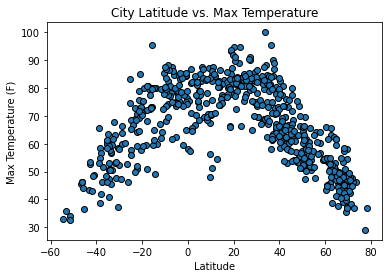

In [8]:
# Build scatter latitude vs Temperature from weather_df
lat_scat = weather_df['Latitude']
temp_scat = weather_df['Max Temp']
plt.scatter(lat_scat, temp_scat, edgecolors='black')
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()


## Latitude vs. Humidity Plot

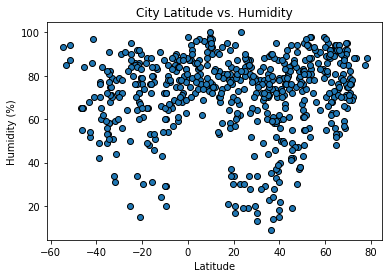

In [9]:
# Build scatter latitude vs Humidity from weather_df
lat_scat = weather_df['Latitude']
Humid_scat = weather_df['Humidity']
plt.scatter(lat_scat, Humid_scat, edgecolors='black')
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

## Latitude vs. Cloudiness Plot

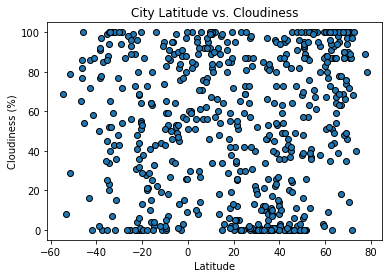

In [10]:
# Build scatter latitude vs Cloudiness from weather_df
lat_scat = weather_df['Latitude']
cloud_scat = weather_df['Cloudiness']
plt.scatter(lat_scat, cloud_scat, edgecolors='black')
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

## Latitude vs. Wind Speed Plot

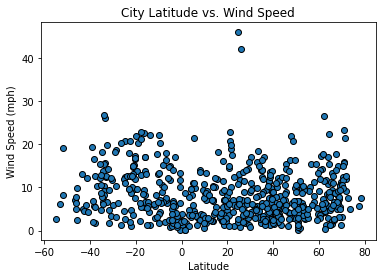

In [11]:
# Build scatter latitude vs Wind Speed from weather_df
lat_scat = weather_df['Latitude']
wind_scat = weather_df['Wind Speed']
plt.scatter(lat_scat, wind_scat, edgecolors='black')
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

## Linear Regression

In [12]:
# Define North Hemisphere and South Hemisphere
north_df = weather_df.loc[weather_df["Latitude"] >= 0,:]
south_df = weather_df.loc[weather_df["Latitude"] <= 0,:]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5913493532780093


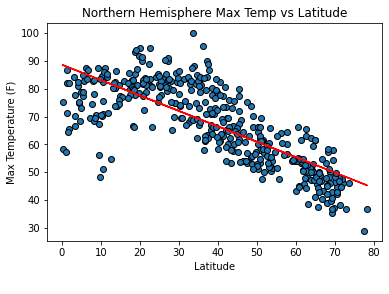

In [13]:
# Build Northern Hemisphere Max Temp vs. Latitude Linear Regression
x_values = north_df["Latitude"]
y_values = north_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors='black')
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere Max Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.66047629885274


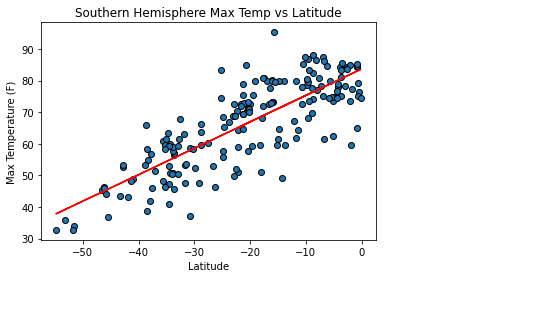

In [14]:
# Build Southern Hemisphere Max Temp vs. Latitude Linear Regression
x_values = south_df["Latitude"]
y_values = south_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors='black')
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere Max Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0015286056537412995


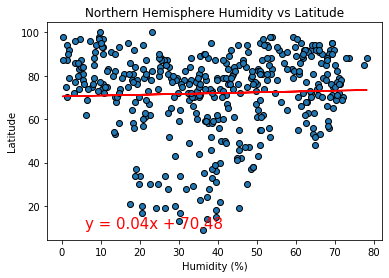

In [15]:
# Build Northern Hemisphere Humidity (%) vs. Latitude Linear Regression
x_values = north_df["Latitude"]
y_values = north_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors='black')
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere Humidity vs Latitude')
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.004338925792281962


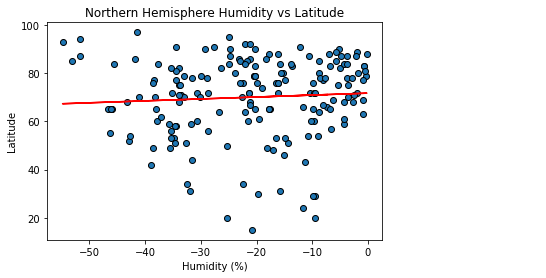

In [16]:
# Build Northern Hemisphere Humidity (%) vs. Latitude Linear Regression
x_values = south_df["Latitude"]
y_values = south_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors='black')
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere Humidity vs Latitude')
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.02370436955801391


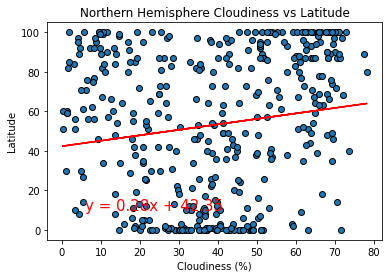

In [17]:
# Build Northern Cloudiness (%) vs. Latitude Linear Regression
x_values = north_df["Latitude"]
y_values = north_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors='black')
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere Cloudiness vs Latitude')
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.013102241501217731


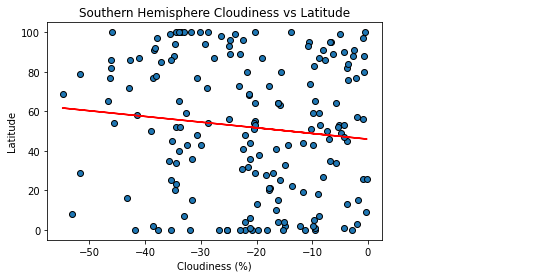

In [18]:
# Build Southern Cloudiness (%) vs. Latitude Linear Regression
x_values = south_df["Latitude"]
y_values = south_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors='black')
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere Cloudiness vs Latitude')
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.013043480395119473


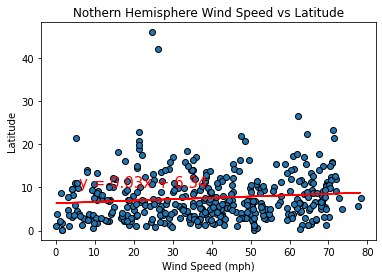

In [19]:
# Build Northern Hemisphere Wind Speed (mph) vs. Latitude Linear Regression
x_values = north_df["Latitude"]
y_values = north_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors='black')
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Nothern Hemisphere Wind Speed vs Latitude')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.015050611190731058


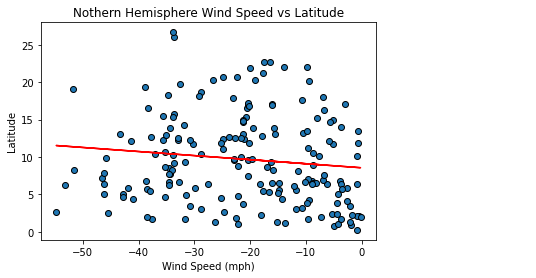

In [20]:
# Build Southern Hemisphere Wind Speed (mph) vs. Latitude Linear Regression
x_values = south_df["Latitude"]
y_values = south_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors='black')
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Nothern Hemisphere Wind Speed vs Latitude')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
print(f"The r-value is: {rvalue**2}")
plt.show()